In [1]:
#Import the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [2]:
#Loading the DF from the CSV Document
df = pd.read_csv('train.csv')
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [6]:
#Exploring the DataFrame
print(df.dtypes)
#Exploring the name of all columns
print(df.columns)

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object
Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', '

# Descriptive Statistics

In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


# Selecting Variables to Work With

Non-categorial Variables Only

In [7]:
# We will first select all those variables that are non-categorical (we include the Dependent Variable 'SalePrice')
df2 = df[['LotFrontage', 'LotArea', 'TotalBsmtSF', 'GrLivArea', 'FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageArea','PoolArea','MiscVal','SalePrice']]

#There are other variables that are also non-categorical but are not included given that they would most probably add unnecessary 'noise'. 
#For example 1srFlrSF (First Floor square feet) and 2ndFlrSF (Second floor square feet) could be considered redundant if we are already considering GrLivArea (above grade living area square feet)
df2

,LotFrontage,LotArea,TotalBsmtSF,GrLivArea,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,PoolArea,MiscVal,SalePrice
0,65.0,8450,856,1710,2,1,3,1,8,0,548,0,0,208500
1,80.0,9600,1262,1262,2,0,3,1,6,1,460,0,0,181500
2,68.0,11250,920,1786,2,1,3,1,6,1,608,0,0,223500
3,60.0,9550,756,1717,1,0,3,1,7,1,642,0,0,140000
4,84.0,14260,1145,2198,2,1,4,1,9,1,836,0,0,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,7917,953,1647,2,1,3,1,7,1,460,0,0,175000
1456,85.0,13175,1542,2073,2,0,3,1,7,2,500,0,0,210000
1457,66.0,9042,1152,2340,2,0,4,1,9,2,252,0,2500,266500
1458,68.0,9717,1078,1078,1,0,2,1,5,0,240,0,0,142125


In [9]:
#Checking if the non-categorical df (df2) has null values that could hinder the model
df2.isnull().sum()

LotFrontage     259
LotArea           0
TotalBsmtSF       0
GrLivArea         0
FullBath          0
HalfBath          0
BedroomAbvGr      0
KitchenAbvGr      0
TotRmsAbvGrd      0
Fireplaces        0
GarageArea        0
PoolArea          0
MiscVal           0
SalePrice         0
dtype: int64

In [10]:
#Given that LotFrontage has rows with null values we could either drop these rows, or replace them with the column's average.
#Dropping these rows would entail dropping 17% of the total rows, for that reason, we proceed with replacing the null values with the column's average
df2.fillna(df.mean(), inplace = True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [11]:
#Checking that the null values have been replaced
df2.isnull().sum()

LotFrontage     0
LotArea         0
TotalBsmtSF     0
GrLivArea       0
FullBath        0
HalfBath        0
BedroomAbvGr    0
KitchenAbvGr    0
TotRmsAbvGrd    0
Fireplaces      0
GarageArea      0
PoolArea        0
MiscVal         0
SalePrice       0
dtype: int64

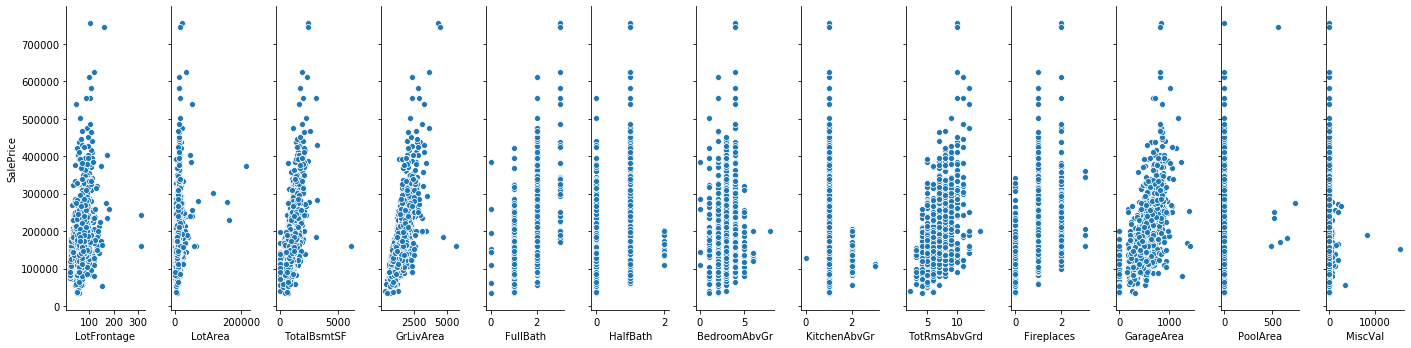

In [12]:
# Using the pairplot to determine how the independent variables affect the dependent variable (SalePrice)
#plt.figure(figsize = (15,5))
g=sn.pairplot(df2,x_vars=['LotFrontage', 'LotArea', 'TotalBsmtSF', 'GrLivArea', 'FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageArea','PoolArea','MiscVal'], y_vars=['SalePrice'], height = 5, aspect=0.3)
#g.fig.set_size_inches(15,5) - This would also change the size (removing height and aspect in the previous line)

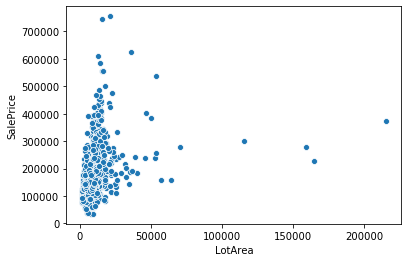

In [13]:
sn.scatterplot(x = 'LotArea', y='SalePrice', data = df2)

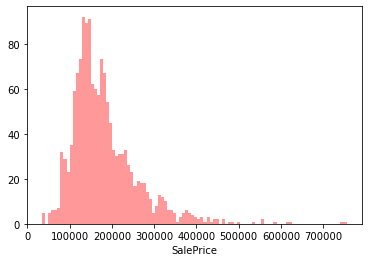

In [15]:
sn.distplot(df2['SalePrice'], kde= False, color='red', bins =100)

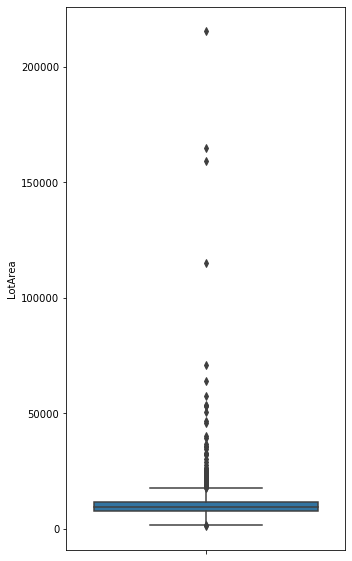

In [16]:
plt.figure(figsize=(5,10))
sn.boxplot(y = 'LotArea', data = df2)

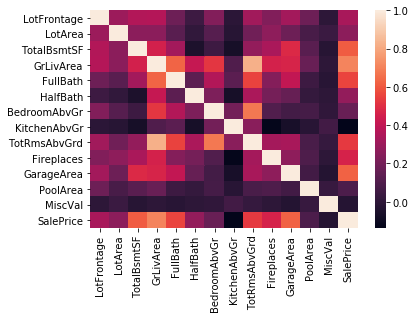

In [17]:
#Using the correlation heatmap from Seaborn
sn.heatmap(df2.corr())

In [18]:
#Correlation Table
df2.corr()

,LotFrontage,LotArea,TotalBsmtSF,GrLivArea,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,PoolArea,MiscVal,SalePrice
LotFrontage,1.000000,0.306795,0.363358,0.368392,0.180424,0.048258,0.237023,-0.005805,0.320146,0.235755,0.323663,0.180868,0.001168,0.334901
LotArea,0.306795,1.000000,0.260833,0.263116,0.126031,0.014259,0.119690,-0.017784,0.190015,0.271364,0.180403,0.077672,0.038068,0.263843
TotalBsmtSF,0.363358,0.260833,1.000000,0.454868,0.323722,-0.048804,0.050450,-0.068901,0.285573,0.339519,0.486665,0.126053,-0.018479,0.613581
GrLivArea,0.368392,0.263116,0.454868,1.000000,0.630012,0.415772,0.521270,0.100063,0.825489,0.461679,0.468997,0.170205,-0.002416,0.708624
FullBath,0.180424,0.126031,0.323722,0.630012,1.000000,0.136381,0.363252,0.133115,0.554784,0.243671,0.405656,0.049604,-0.014290,0.560664
HalfBath,0.048258,0.014259,-0.048804,0.415772,0.136381,1.000000,0.226651,-0.068263,0.343415,0.203649,0.163549,0.022381,0.001290,0.284108
BedroomAbvGr,0.237023,0.119690,0.050450,0.521270,0.363252,0.226651,1.000000,0.198597,0.676620,0.107570,0.065253,0.070703,0.007767,0.168213
KitchenAbvGr,-0.005805,-0.017784,-0.068901,0.100063,0.133115,-0.068263,0.198597,1.000000,0.256045,-0.123936,-0.064433,-0.014525,0.062341,-0.135907
TotRmsAbvGrd,0.320146,0.190015,0.285573,0.825489,0.554784,0.343415,0.676620,0.256045,1.000000,0.326114,0.337822,0.083757,0.024763,0.533723
Fireplaces,0.235755,0.271364,0.339519,0.461679,0.243671,0.203649,0.107570,-0.123936,0.326114,1.000000,0.269141,0.095074,0.001409,0.466929


# Linear Regression Model

Using STATSMODEL

In [20]:
#Assigning X and Y
x_df = df2.drop(columns = ['SalePrice'])
y_df = df2.drop(columns = ['LotFrontage', 'LotArea', 'TotalBsmtSF', 'GrLivArea', 'FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageArea','PoolArea','MiscVal'])

#Adding the Constant (b)
x_train = sm.add_constant(x_df) 

#Running the Model
lm1 = sm.OLS(y_df, x_train).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.726
Model:                            OLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                     294.6
Date:                Sun, 12 Jan 2020   Prob (F-statistic):               0.00
Time:                        13:24:16   Log-Likelihood:                -17599.
No. Observations:                1460   AIC:                         3.523e+04
Df Residuals:                    1446   BIC:                         3.530e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         3.284e+04   7266.335      4.519      0.000    1.86e+04    4.71e+04
LotFrontage     11.8929     58.052      0.205      0.838    -101.981     125.767
LotArea          0.2441      0.119      2.043      0.041       0.010       0.479
TotalBsmtSF     45.0576      3.291     13.693      0.000      38.603      51.512
GrLivArea       45.2921      4.898      9.247      0.000      35.684      54.900
FullBath      2.563e+04   2687.792      9.537      0.000    2.04e+04    3.09e+04
HalfBath      1.224e+04   2599.249      4.709      0.000    7141.066    1.73e+04
BedroomAbvGr -1.756e+04   1921.805     -9.136      0.000   -2.13e+04   -1.38e+04
KitchenAbvGr -5.322e+04   5424.961     -9.810      0.000   -6.39e+04   -4.26e+04
TotRmsAbvGrd  7438.9490   1452.786      5.120      0.000    4589.156    1.03e+04
Fireplaces    9277.8127   2013.575      4.608      0.000    5327.972    1.32e+04
GarageArea      75.2451      6.497     11.582      0.000      62.501      87.989
PoolArea       -49.6353     28.162     -1.762      0.078    -104.878       5.607
MiscVal         -0.2528      2.215     -0.114      0.909      -4.598       4.092
==============================================================================
Omnibus:                      677.948   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            72711.401
Skew:                          -1.182   Prob(JB):                         0.00
Kurtosis:                      37.492   Cond. No.                     1.10e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.1e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Fine-tuning the Model

In [21]:
#Analyzing the p value we can safely conclude that MiscVal (pvalue of 0.823), and LotFrontage (0.134) are not statistically significant. We proceed to remove these from the DF and rerun our model:
x_df_adj = df2.drop(columns=['MiscVal', 'LotFrontage','SalePrice'])
x_train2 = sm.add_constant(x_df_adj) ## let's add an intercept (beta_0) to our model
lm1 = sm.OLS(y_df, x_train2).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.726
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                     348.7
Date:                Sun, 12 Jan 2020   Prob (F-statistic):               0.00
Time:                        13:25:14   Log-Likelihood:                -17599.
No. Observations:                1460   AIC:                         3.522e+04
Df Residuals:                    1448   BIC:                         3.529e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         3.327e+04   6977.257      4.769      0.000    1.96e+04     4.7e+04
LotArea          0.2481      0.117      2.116      0.035       0.018       0.478
TotalBsmtSF     45.1627      3.250     13.894      0.000      38.787      51.539
GrLivArea       45.3602      4.886      9.284      0.000      35.776      54.945
FullBath      2.558e+04   2669.090      9.583      0.000    2.03e+04    3.08e+04
HalfBath       1.22e+04   2591.331      4.708      0.000    7117.412    1.73e+04
BedroomAbvGr -1.751e+04   1906.561     -9.182      0.000   -2.12e+04   -1.38e+04
KitchenAbvGr -5.328e+04   5412.629     -9.843      0.000   -6.39e+04   -4.27e+04
TotRmsAbvGrd  7444.8497   1449.390      5.137      0.000    4601.721    1.03e+04
Fireplaces    9287.2803   2011.440      4.617      0.000    5341.633    1.32e+04
GarageArea      75.4702      6.409     11.775      0.000      62.898      88.042
PoolArea       -49.0569     27.925     -1.757      0.079    -103.835       5.721
==============================================================================
Omnibus:                      673.114   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            71682.346
Skew:                          -1.167   Prob(JB):                         0.00
Kurtosis:                      37.247   Cond. No.                     1.08e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.08e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [22]:
#With this new analysis, PoolArea seems to also not be statistically significant
x_df_adj = x_df_adj.drop(columns = ['PoolArea'])
x_train3 = sm.add_constant(x_df_adj) ## let's add an intercept (beta_0) to our model
lm1 = sm.OLS(y_df, x_train3).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.725
Model:                            OLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                     382.7
Date:                Sun, 12 Jan 2020   Prob (F-statistic):               0.00
Time:                        13:25:57   Log-Likelihood:                -17601.
No. Observations:                1460   AIC:                         3.522e+04
Df Residuals:                    1449   BIC:                         3.528e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         3.357e+04   6980.206      4.809      0.000    1.99e+04    4.73e+04
LotArea          0.2451      0.117      2.090      0.037       0.015       0.475
TotalBsmtSF     44.9612      3.251     13.831      0.000      38.585      51.338
GrLivArea       43.9338      4.822      9.112      0.000      34.476      53.392
FullBath      2.592e+04   2663.905      9.730      0.000    2.07e+04    3.11e+04
HalfBath      1.244e+04   2589.679      4.803      0.000    7357.634    1.75e+04
BedroomAbvGr -1.763e+04   1906.553     -9.249      0.000   -2.14e+04   -1.39e+04
KitchenAbvGr -5.326e+04   5416.513     -9.832      0.000   -6.39e+04   -4.26e+04
TotRmsAbvGrd  7684.4991   1443.994      5.322      0.000    4851.956    1.05e+04
Fireplaces    9279.3125   2012.882      4.610      0.000    5330.838    1.32e+04
GarageArea      75.7532      6.412     11.815      0.000      63.176      88.330
==============================================================================
Omnibus:                      740.581   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            83203.084
Skew:                          -1.379   Prob(JB):                         0.00
Kurtosis:                      39.880   Cond. No.                     1.08e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.08e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [24]:
#From the correlation heatmap we can see that GrLivArea has a high correlation with TotRmsAbvGrd which could indicate multicollinearity.
#we decide to try our model without TotRmsAbvGrd
x_df_=x_df_adj.drop(columns = ['TotRmsAbvGrd'])
x_train_ = sm.add_constant(x_df_)
lm1 = sm.OLS(y_df, x_train_).fit()
print(lm1.summary())

#And without GrLivArea (with TotRmsAvgGrd)
x_df_2 = x_df_adj.drop(columns = ['GrLivArea'])
x_train_2 = sm.add_constant(x_df_2)
lm2 = sm.OLS(y_df, x_train_2).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.720
Model:                            OLS   Adj. R-squared:                  0.718
Method:                 Least Squares   F-statistic:                     414.2
Date:                Sun, 12 Jan 2020   Prob (F-statistic):               0.00
Time:                        13:30:01   Log-Likelihood:                -17615.
No. Observations:                1460   AIC:                         3.525e+04
Df Residuals:                    1450   BIC:                         3.530e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          3.87e+04   6978.219      5.545   

In [ ]:
#Given that the new Rsquared are lower than the original, we maintain both Variables in the Model

Eliminating Outliers from Data:

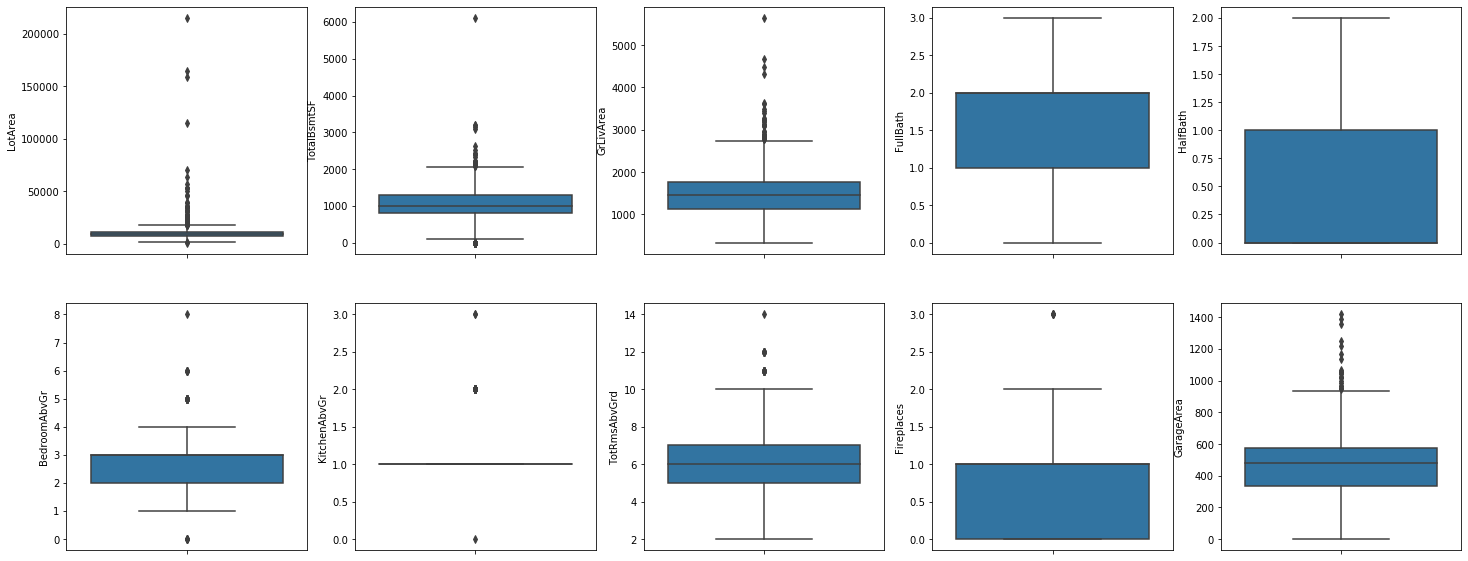

In [153]:
#Visualizing Outliers
fig,((ax1,ax2,ax3,ax4,ax5),(ax6,ax7,ax8,ax9,ax10)) = plt.subplots(2,5, figsize=(25,10), sharex=False) #Con sharex TRUE se comparte el mismo eje x
sn.boxplot(y='LotArea', data=x_df_adj2, ax=ax1)
sn.boxplot(y='TotalBsmtSF', data=x_df_adj2, ax=ax2)
sn.boxplot(y='GrLivArea', data=x_df_adj2, ax=ax3)
sn.boxplot(y='FullBath', data=x_df_adj2, ax=ax4)    
sn.boxplot(y='HalfBath', data=x_df_adj2, ax=ax5)
sn.boxplot(y='BedroomAbvGr', data=x_df_adj2, ax=ax6)
sn.boxplot(y='KitchenAbvGr', data=x_df_adj2, ax=ax7)
sn.boxplot(y='TotRmsAbvGrd', data=x_df_adj2, ax=ax8)
sn.boxplot(y='Fireplaces', data=x_df_adj2, ax=ax9)
sn.boxplot(y='GarageArea', data=x_df_adj2, ax=ax10)

In [27]:
#From the previous, one can tell that LotArea, TotalBsmtSF, GrLivArea and GarageArea have a high number of outliers, with BedroomAvbGr, and TotRmsAbvGrd having fewer outliers.
#We will proceed by eliminating the outliers for LotArea, TotalBsmtSF, GrLivArea ad GarageArea taking into consideration the 1.5IQR factor.

#DataFrame after having dropped columns that had no statistical significance
df2_ = df2.drop(columns = ['PoolArea', 'MiscVal','LotFrontage'])

#Quantiles and IQR
Q1a=df2_.LotArea.quantile(0.25)
Q3a=df2_.LotArea.quantile(0.75)
IQR=Q3a-Q1a
Q1b=df2_.GarageArea.quantile(0.25)
Q3b=df2_.GarageArea.quantile(0.75)
IQRb=Q3b-Q1b
Q1c=df2_.TotalBsmtSF.quantile(0.25)
Q3c=df2_.TotalBsmtSF.quantile(0.75)
IQRc=Q3c-Q1c
Q1d=df2_.GrLivArea.quantile(0.25)
Q3d=df2_.GrLivArea.quantile(0.75)
IQRd=Q3d-Q1d
x_filter = df2_.query('(@Q1a - 1.5 * @IQR) <= LotArea <= (@Q3a + 1.5 * @IQR)')
x_filter2 = x_filter.query('(@Q1b - 1.5 * @IQRb) <= GarageArea <= (@Q3b + 1.5 * @IQRb)')
x_filter3 = x_filter2.query('(@Q1c - 1.5 * @IQRc) <= TotalBsmtSF <= (@Q3c + 1.5 * @IQRc)')
x_filter4 = x_filter3.query('(@Q1d - 1.5 * @IQRd) <= GrLivArea <= (@Q3d + 1.5 * @IQRd)')
x_filter4


,LotArea,TotalBsmtSF,GrLivArea,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,SalePrice
0,8450,856,1710,2,1,3,1,8,0,548,208500
1,9600,1262,1262,2,0,3,1,6,1,460,181500
2,11250,920,1786,2,1,3,1,6,1,608,223500
3,9550,756,1717,1,0,3,1,7,1,642,140000
4,14260,1145,2198,2,1,4,1,9,1,836,250000
...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,953,1647,2,1,3,1,7,1,460,175000
1456,13175,1542,2073,2,0,3,1,7,2,500,210000
1457,9042,1152,2340,2,0,4,1,9,2,252,266500
1458,9717,1078,1078,1,0,2,1,5,0,240,142125


In [29]:
#Assigning X and Y DF
x_df2_ = df2_.drop(columns = ['SalePrice'])
y_df2_ = df2_.drop(columns = ['LotArea', 'TotalBsmtSF', 'GrLivArea', 'FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageArea'])

#Running the Model Again
x_train3 = sm.add_constant(x_df2_)
lm1 = sm.OLS(y_df2_, x_train3).fit()
lm1.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.725
Model:                            OLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                     382.7
Date:                Sun, 12 Jan 2020   Prob (F-statistic):               0.00
Time:                        13:33:29   Log-Likelihood:                -17601.
No. Observations:                1460   AIC:                         3.522e+04
Df Residuals:                    1449   BIC:                         3.528e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         3.357e+04   6980.206      4.809      0.000    1.99e+04    4.73e+04
LotArea          0.2451      0.117      2.090      0.037       0.015       0.475
TotalBsmtSF     44.9612      3.251     13.831      0.000      38.585      51.338
GrLivArea       43.9338      4.822      9.112      0.000      34.476      53.392
FullBath      2.592e+04   2663.905      9.730      0.000    2.07e+04    3.11e+04
HalfBath      1.244e+04   2589.679      4.803      0.000    7357.634    1.75e+04
BedroomAbvGr -1.763e+04   1906.553     -9.249      0.000   -2.14e+04   -1.39e+04
KitchenAbvGr -5.326e+04   5416.513     -9.832      0.000   -6.39e+04   -4.26e+04
TotRmsAbvGrd  7684.4991   1443.994      5.322      0.000    4851.956    1.05e+04
Fireplaces    9279.3125   2012.882      4.610      0.000    5330.838    1.32e+04
GarageArea      75.7532      6.412     11.815      0.000      63.176      88.330
==============================================================================
Omnibus:                      740.581   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            83203.084
Skew:                          -1.379   Prob(JB):                         0.00
Kurtosis:                      39.880   Cond. No.                     1.08e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.08e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Eliminating the Outliers did not increase our R squared.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.789
Method:                 Least Squares   F-statistic:                     421.0
Date:                Sun, 12 Jan 2020   Prob (F-statistic):               0.00
Time:                        13:34:19   Log-Likelihood:                -17401.
No. Observations:                1460   AIC:                         3.483e+04
Df Residuals:                    1446   BIC:                         3.490e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -1.015e+06   1.03e+05     -9.877      0.000   -1.22e+06   -8.13e+05
OverallQual   1.711e+04   1185.336     14.435      0.000    1.48e+04    1.94e+04
OverallCond   6183.9798    958.630      6.451      0.000    4303.526    8064.434
YearBuilt      480.0462     52.366      9.167      0.000     377.324     582.768
LotArea          0.5432      0.104      5.242      0.000       0.340       0.747
TotalBsmtSF     23.4810      3.105      7.563      0.000      17.390      29.571
GrLivArea       48.2413      4.547     10.609      0.000      39.321      57.161
FullBath       601.7996   2810.876      0.214      0.831   -4912.032    6115.631
HalfBath     -1965.4724   2494.138     -0.788      0.431   -6857.988    2927.043
BedroomAbvGr   -1.1e+04   1703.393     -6.457      0.000   -1.43e+04   -7657.452
KitchenAbvGr -2.178e+04   4958.717     -4.392      0.000   -3.15e+04   -1.21e+04
TotRmsAbvGrd  5953.5857   1267.079      4.699      0.000    3468.075    8439.096
Fireplaces    6420.0039   1767.942      3.631      0.000    2951.999    9888.009
GarageArea      39.1312      5.943      6.585      0.000      27.474      50.788
==============================================================================
Omnibus:                      694.488   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           122331.961
Skew:                          -1.103   Prob(JB):                         0.00
Kurtosis:                      47.789   Cond. No.                     1.58e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.58e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

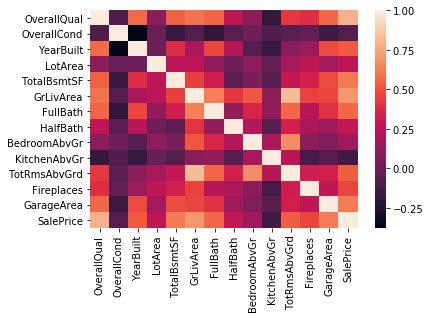

In [30]:
#We will try incorporating some categorical (albeit numerical) variables into our Model (OverallQual, OverallCond,YearBuilt )
df3 = df[['OverallQual', 'OverallCond', 'YearBuilt', 'LotArea', 'TotalBsmtSF', 'GrLivArea', 'FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageArea','SalePrice']]

#Check to see no null values in our three additional variables
df3.isnull().sum()

#Check the correlation heatmap
sn.heatmap(df3.corr())

#Assign X and Y
x_df3 = df3.drop(columns = ['SalePrice'])
y_df3 = df3.drop(columns = ['OverallQual', 'OverallCond', 'YearBuilt', 'LotArea', 'TotalBsmtSF', 'GrLivArea', 'FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageArea'])
xtrain = sm.add_constant(x_df3)

#Run the Model
lm3 = sm.OLS(y_df3, xtrain).fit()
lm3.summary()

Using SKLEARN

In [39]:
#Import the neccessary libraries
from sklearn.linear_model import LinearRegression

#Linear Model
lm2 = LinearRegression()
lm2 = lm2.fit(x_df3, y_df3)

lm2.coef_

#Storing the coefficients in a data frame that includes the respective independent variable names
coeff = pd.concat([pd.DataFrame(x_df3.columns), pd.DataFrame(np.transpose(lm2.coef_))], axis = 1)

#Changing the name of the Columns
coeff.columns = ['Variable', 'Coefficient'] 
print(coeff)

print(lm2.intercept_)

        Variable   Coefficient
0    OverallQual  17109.843935
1    OverallCond   6183.979772
2      YearBuilt    480.046201
3        LotArea      0.543225
4    TotalBsmtSF     23.480954
5      GrLivArea     48.241253
6       FullBath    601.799552
7       HalfBath  -1965.472415
8   BedroomAbvGr -10998.836870
9   KitchenAbvGr -21777.144038
10  TotRmsAbvGrd   5953.585739
11    Fireplaces   6420.003914
12    GarageArea     39.131191
[-1014983.45542525]


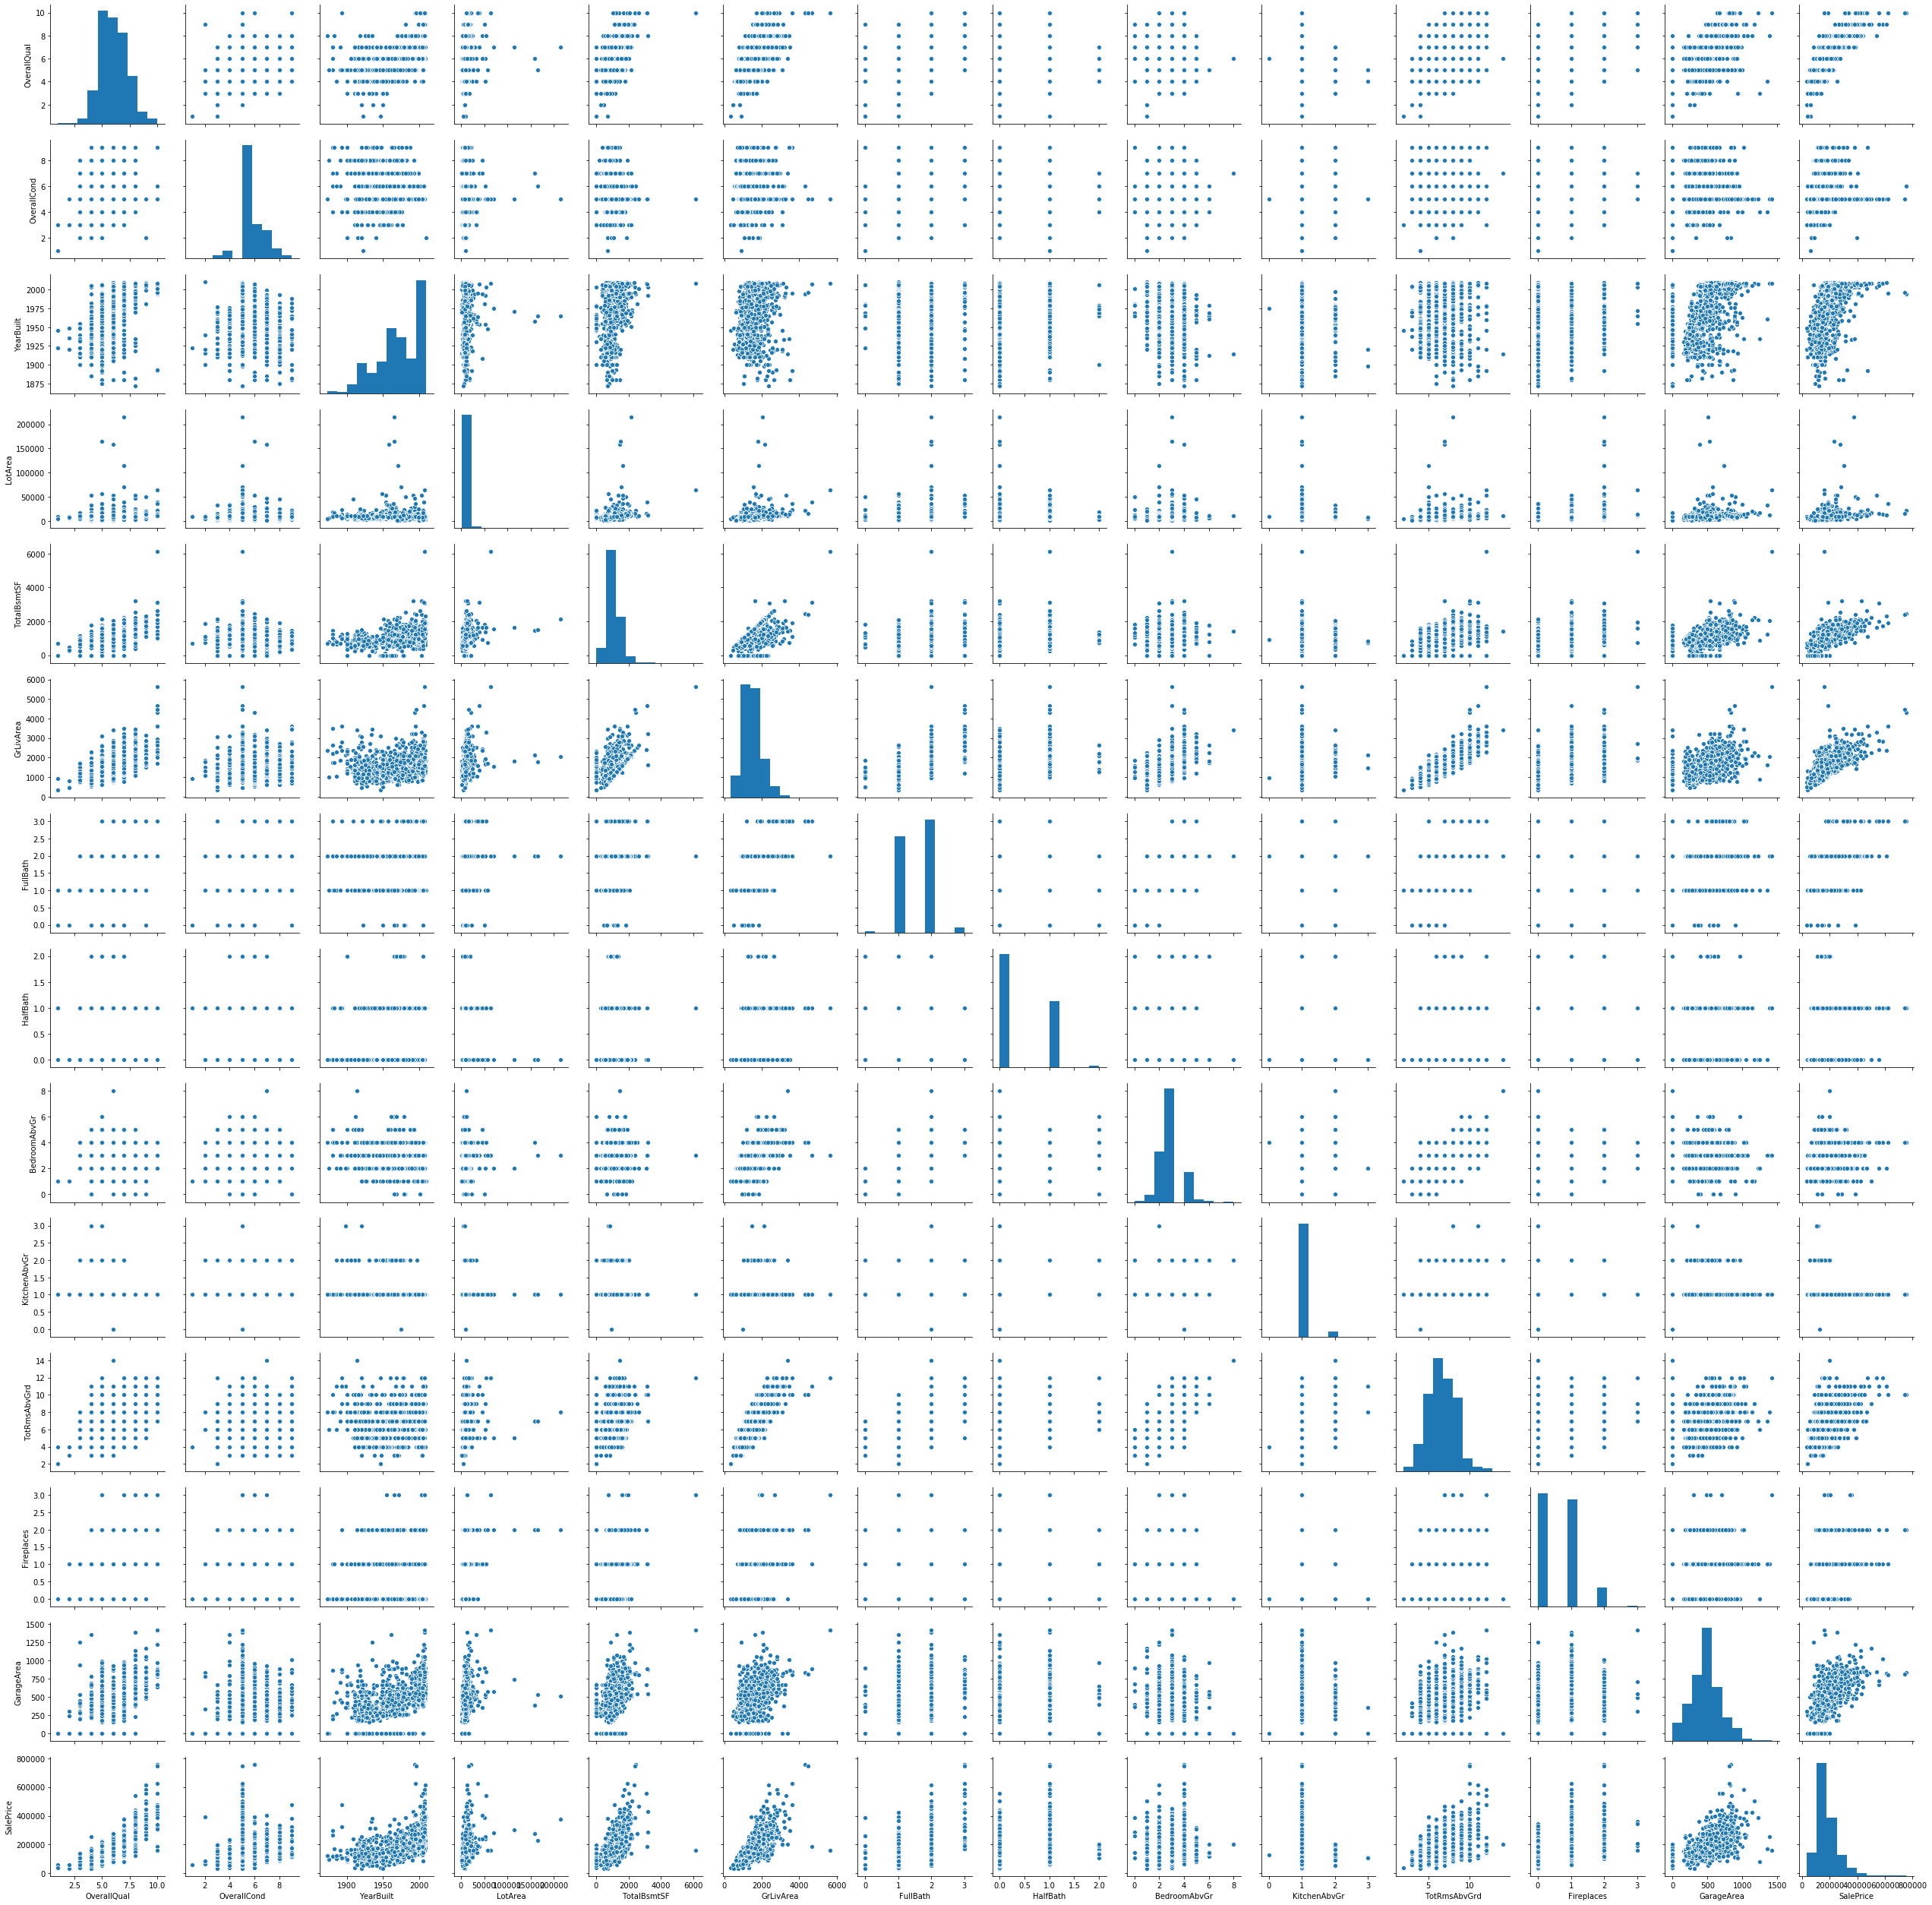

In [152]:
sn.pairplot(df3)